In [8]:
import pandas as pd
import os

In [9]:
table1 = pd.read_csv("Table1.csv", encoding='latin1')
table2 = pd.read_csv("Table2.csv", encoding='latin1')

In [10]:
table1.head()

,formation,collapse,Society_Polity,NaturalGeoArea,quasi_polity,age
0,1748,1826,AfDurrn,Kachi Plain,False,78
1,1193,1206,AfGhurd,Kachi Plain,False,13
2,-248,-130,AfGrBct,Sogdiana,False,118
3,426,563,AfHepht,Sogdiana,False,137
4,496,531,AfHepht,Kachi Plain,False,35


In [11]:
table2.head()

,Society_Polity,State_Formation_low,State_Formation_high,formation,Adulthood_Date,Peak_Power,Collapse_low,Collapse_high,collapse,Approx_age,...,continent,lon1,Capital_2,lat2,lon2,Capital_3,lat3,lon3,violience_attractor,censored
0,Egyptian Dynasties I and II,-3100,NaN,-3100.0,NaN,NaN,-2687.0,NaN,-2687.0,413-413 years,...,Africa,31.250833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Old Egytpian Kingdom,-2650,-2592.0,-2621.0,-2800.0,-2400.0,-2160.0,-2150.0,-2155.0,432-500 years,...,Africa,31.250833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,The Akkadian Empire (Sumer),-2334,NaN,-2334.0,-2310.0,NaN,-2154.0,-2142.0,-2148.0,180-192 years,...,Asia,NaN,Kish,32.540278,44.604722,NaN,NaN,NaN,NaN,False
3,Ur III Dynasty (Neo-Sumerian Empire),-2112,NaN,-2112.0,NaN,NaN,-2004.0,NaN,-2004.0,108-108 years,...,Asia,46.103056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,Xia Dynasty,-2070,-1850.0,-1960.0,NaN,-1800.0,-1651.0,-1600.0,-1625.5,199-470 years,...,Asia,113.025131,Yangcheng (modern Gaocheng),34.400600,113.150300,NaN,NaN,NaN,NaN,False


In [ ]:
table2_sorted = table2.sort_values(by='formation')

0      0
1      0
672    0
2      0
3      0
      ..
569    4
570    4
571    4
572    4
573    4
Name: binned_formation, Length: 731, dtype: int64

In [55]:
bins = [table2_sorted['formation'].min(), table2_sorted['formation'].quantile(0.25), table2_sorted['formation'].quantile(0.5), table2_sorted['formation'].quantile(0.75), table2_sorted['formation'].max()]
table2_sorted['formation_bin'] = pd.cut(table2_sorted['formation'], bins=bins, include_lowest=True, labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [ ]:
table2_sorted.head()

,Society_Polity,State_Formation_low,State_Formation_high,formation,Adulthood_Date,Peak_Power,Collapse_low,Collapse_high,collapse,Approx_age,...,lat2,lon2,Capital_3,lat3,lon3,violience_attractor,censored,cause,binned_formation,formation_bin
0,Egyptian Dynasties I and II,-3100,NaN,-3100.0,NaN,NaN,-2687.0,NaN,-2687.0,413-413 years,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Civiil war and disorder.,0,Q1
1,Old Egytpian Kingdom,-2650,-2592.0,-2621.0,-2800.0,-2400.0,-2160.0,-2150.0,-2155.0,432-500 years,...,NaN,NaN,NaN,NaN,NaN,NaN,False,,0,Q1
672,Guo,0,0.0,-2600.0,0.0,0.0,0.0,0.0,-670.0,NaN,...,0.000000,0.000000,NaN,0.0,0.0,0.0,False,,0,Q1
2,The Akkadian Empire (Sumer),-2334,NaN,-2334.0,-2310.0,NaN,-2154.0,-2142.0,-2148.0,180-192 years,...,32.540278,44.604722,NaN,NaN,NaN,NaN,False,Invasion of Gutians. Climate change.,0,Q1
3,Ur III Dynasty (Neo-Sumerian Empire),-2112,NaN,-2112.0,NaN,NaN,-2004.0,NaN,-2004.0,108-108 years,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Elamite rebellion.,0,Q1


Text(0, 0.5, 'Age')

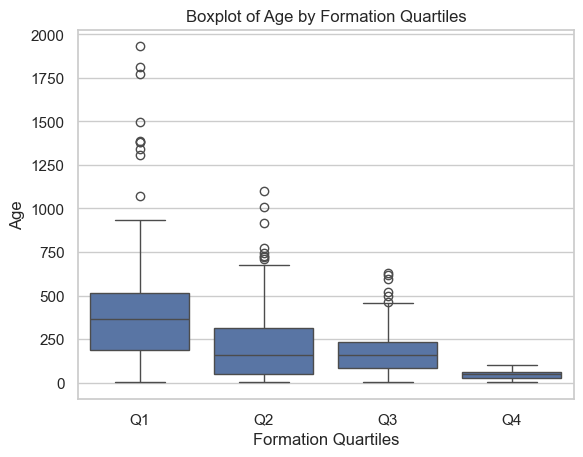

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='formation_bin', y='age', data=table2_sorted)
plt.title('Boxplot of Age by Formation Quartiles')
plt.xlabel('Formation Quartiles')
plt.ylabel('Age')

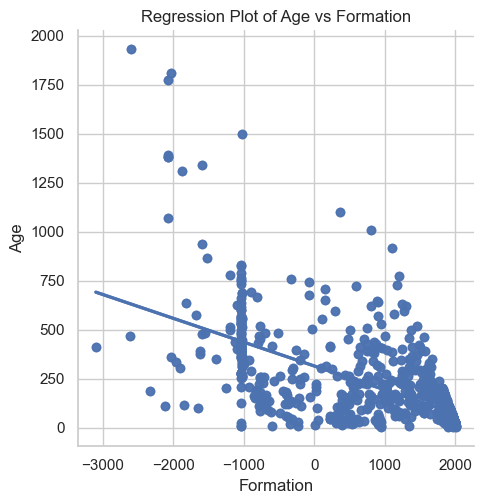

In [ ]:
sns.lmplot(x='formation', y='age', data=table2_sorted, ci=None)
plt.title('Scatter Plot of Age vs Formation')
plt.xlabel('Formation')
plt.ylabel('Age')
sns.regplot(x='formation', y='age', data=table2_sorted, ci=None)

In [64]:
table2_sorted['delta'] = table2_sorted['censored'].map({True: 0, False: 1})

/opt/miniconda3/envs/tf_env/lib/python3.11/site-packages/lifelines/plotting.py:773: UserWarning: For less visual clutter, you may want to subsample to less than 25 individuals.
  warnings.warn(


Text(0.5, 0, 'Age')

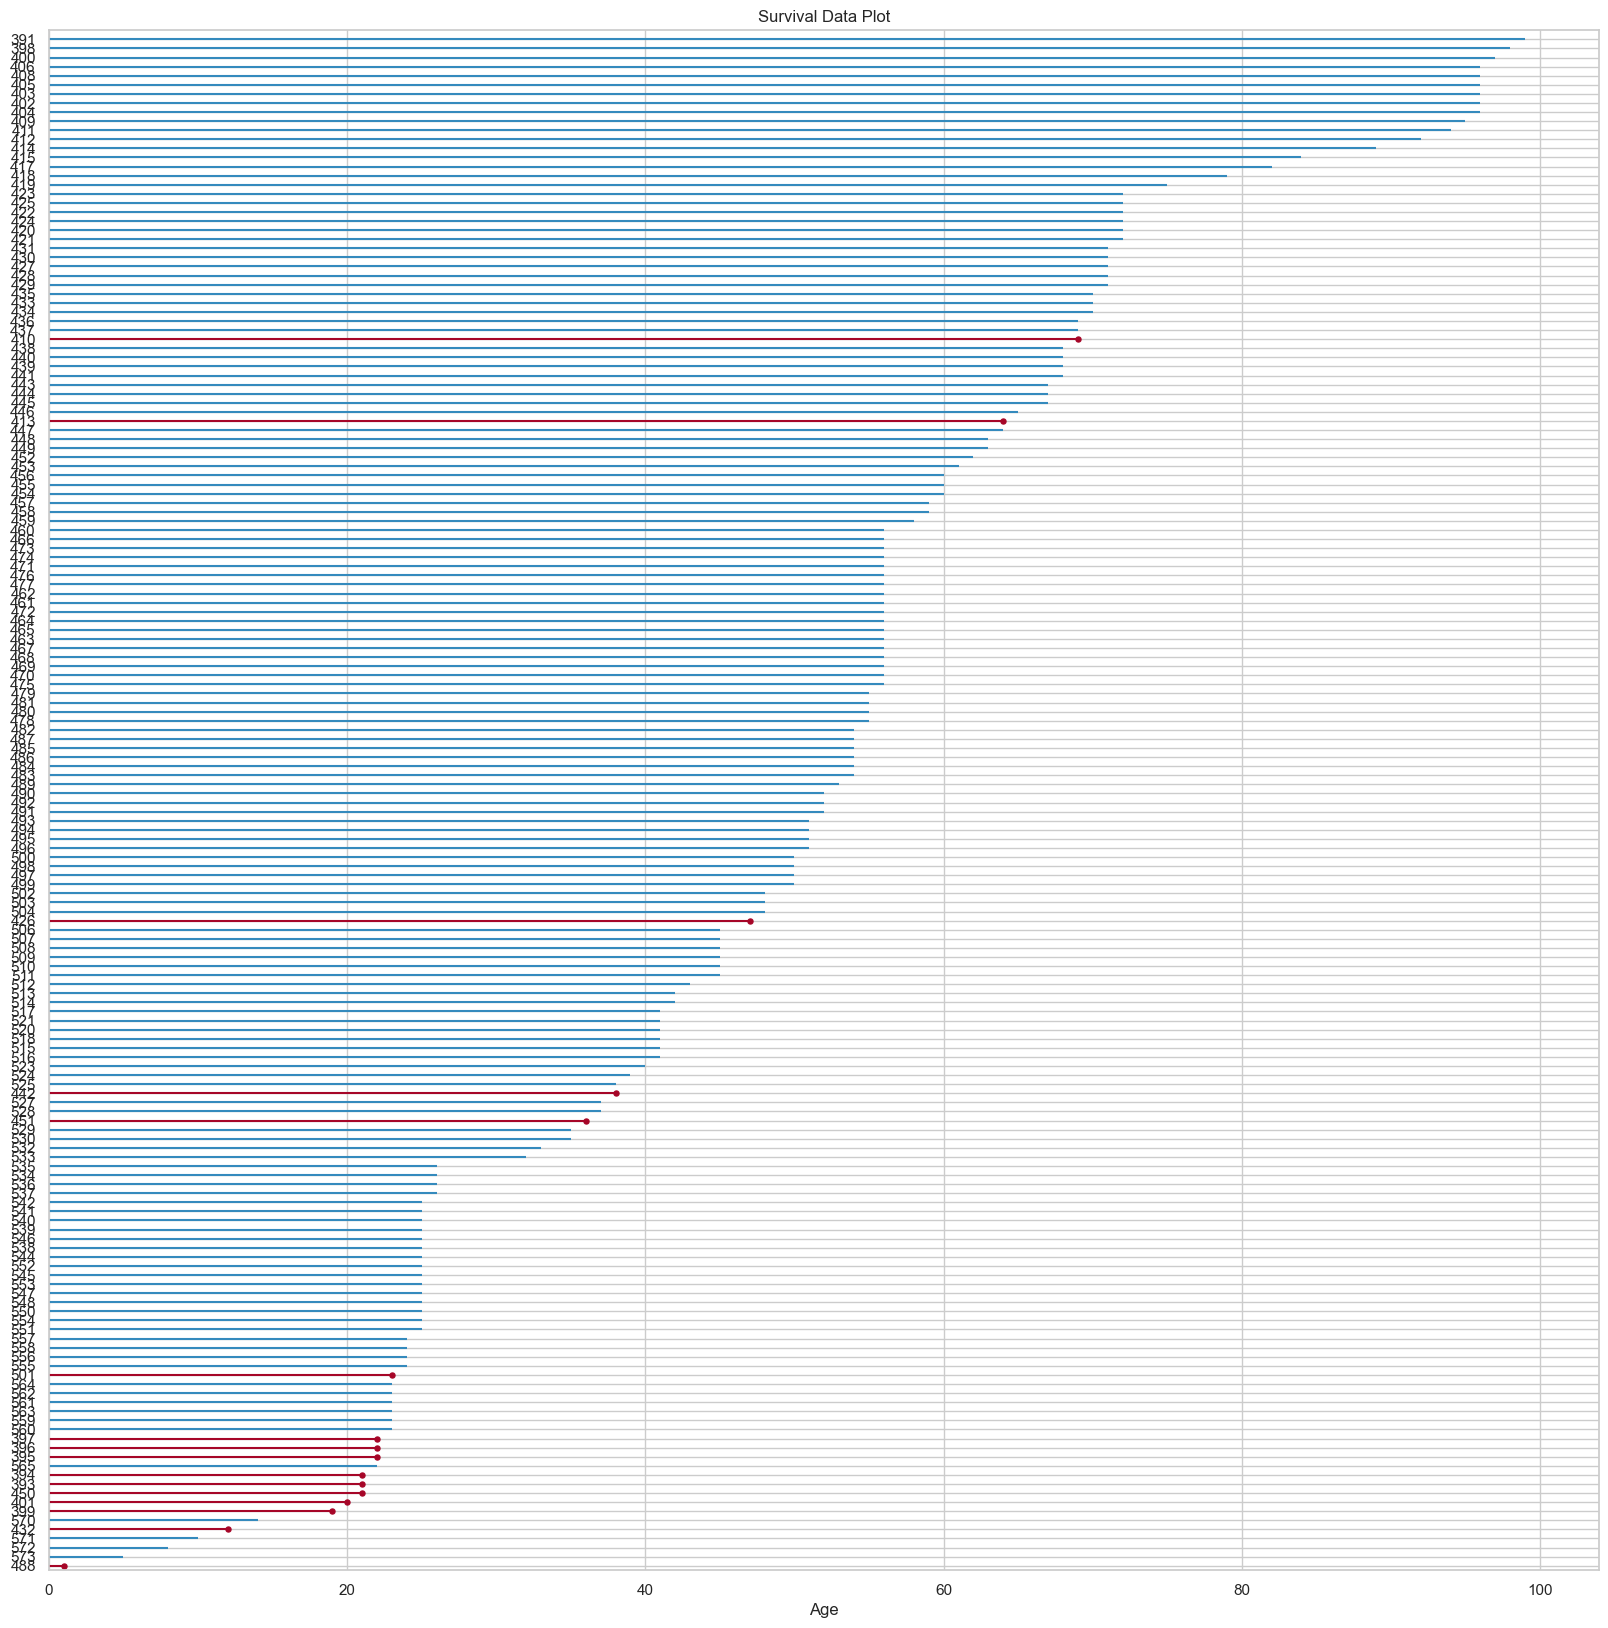

In [154]:
survival_data = table2_sorted[['Society_Polity','age', 'delta', 'formation_bin', 'Political_Type', 'continent', 'formation']].dropna()
from lifelines.plotting import plot_lifetimes
fig, ax = plt.subplots(figsize=(20, 20))
survival_data1 = survival_data[survival_data['formation_bin'] == 'Q4']
ax = plot_lifetimes(survival_data1['age'], event_observed=survival_data1['delta'], label='Survival Data')
ax.set_title('Survival Data Plot')
ax.set_xlabel('Age')

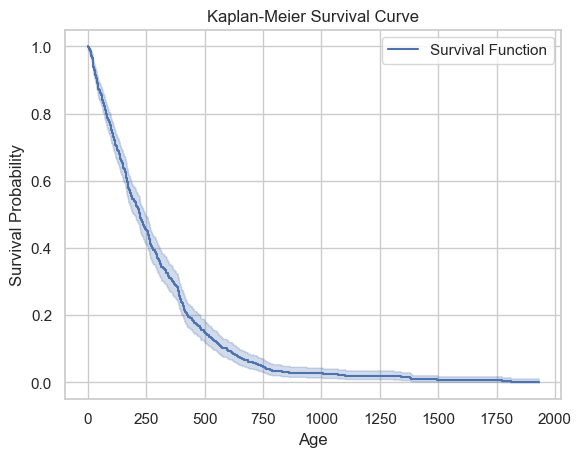

In [ ]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(survival_data['age'], event_observed=survival_data['delta'])
kmf.plot(label='Survival Function')
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Age')
plt.ylabel('Survival Probability')
plt.show()

Text(0, 0.5, 'Cumulative Density')

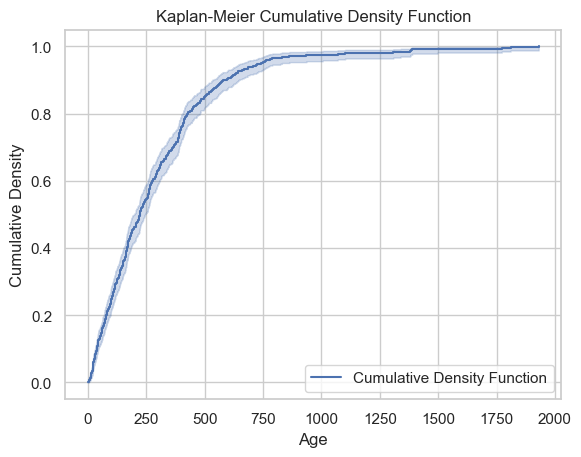

In [87]:
kmf.plot_cumulative_density(label='Cumulative Density Function')
plt.title('Kaplan-Meier Cumulative Density Function')
plt.xlabel('Age')
plt.ylabel('Cumulative Density')


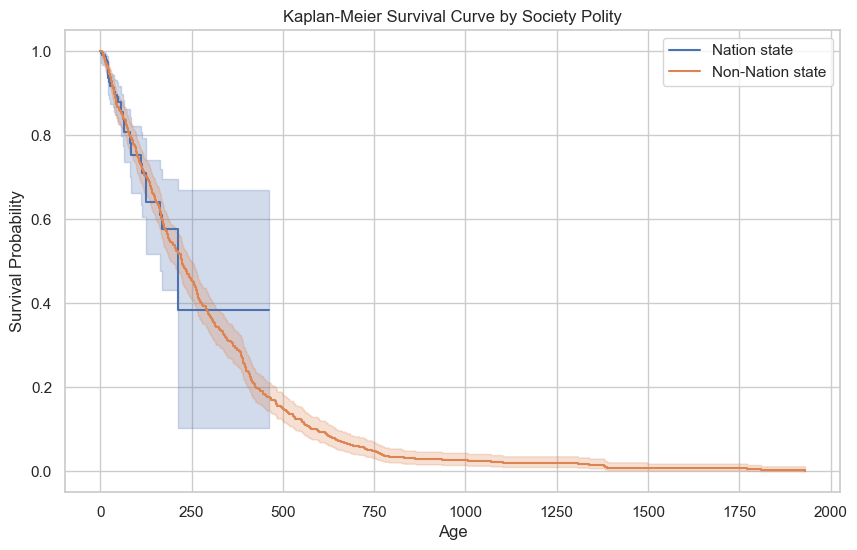

In [102]:
# Ensure 'age' is numeric and drop rows with NaN ages
survival_data['age'] = pd.to_numeric(survival_data['age'], errors='coerce')

nation = (survival_data['Political_Type'] == 'Nation state')
fig, ax = plt.subplots(figsize=(10, 6))
kmf.fit(survival_data[nation]['age'], event_observed=survival_data[nation]['delta'], label='Nation state')
kmf.plot_survival_function(ax=ax)

kmf.fit(survival_data[~nation]['age'], event_observed=survival_data[~nation]['delta'], label='Non-Nation state')
kmf.plot_survival_function(ax=ax)

plt.title('Kaplan-Meier Survival Curve by Society Polity')
plt.xlabel('Age')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

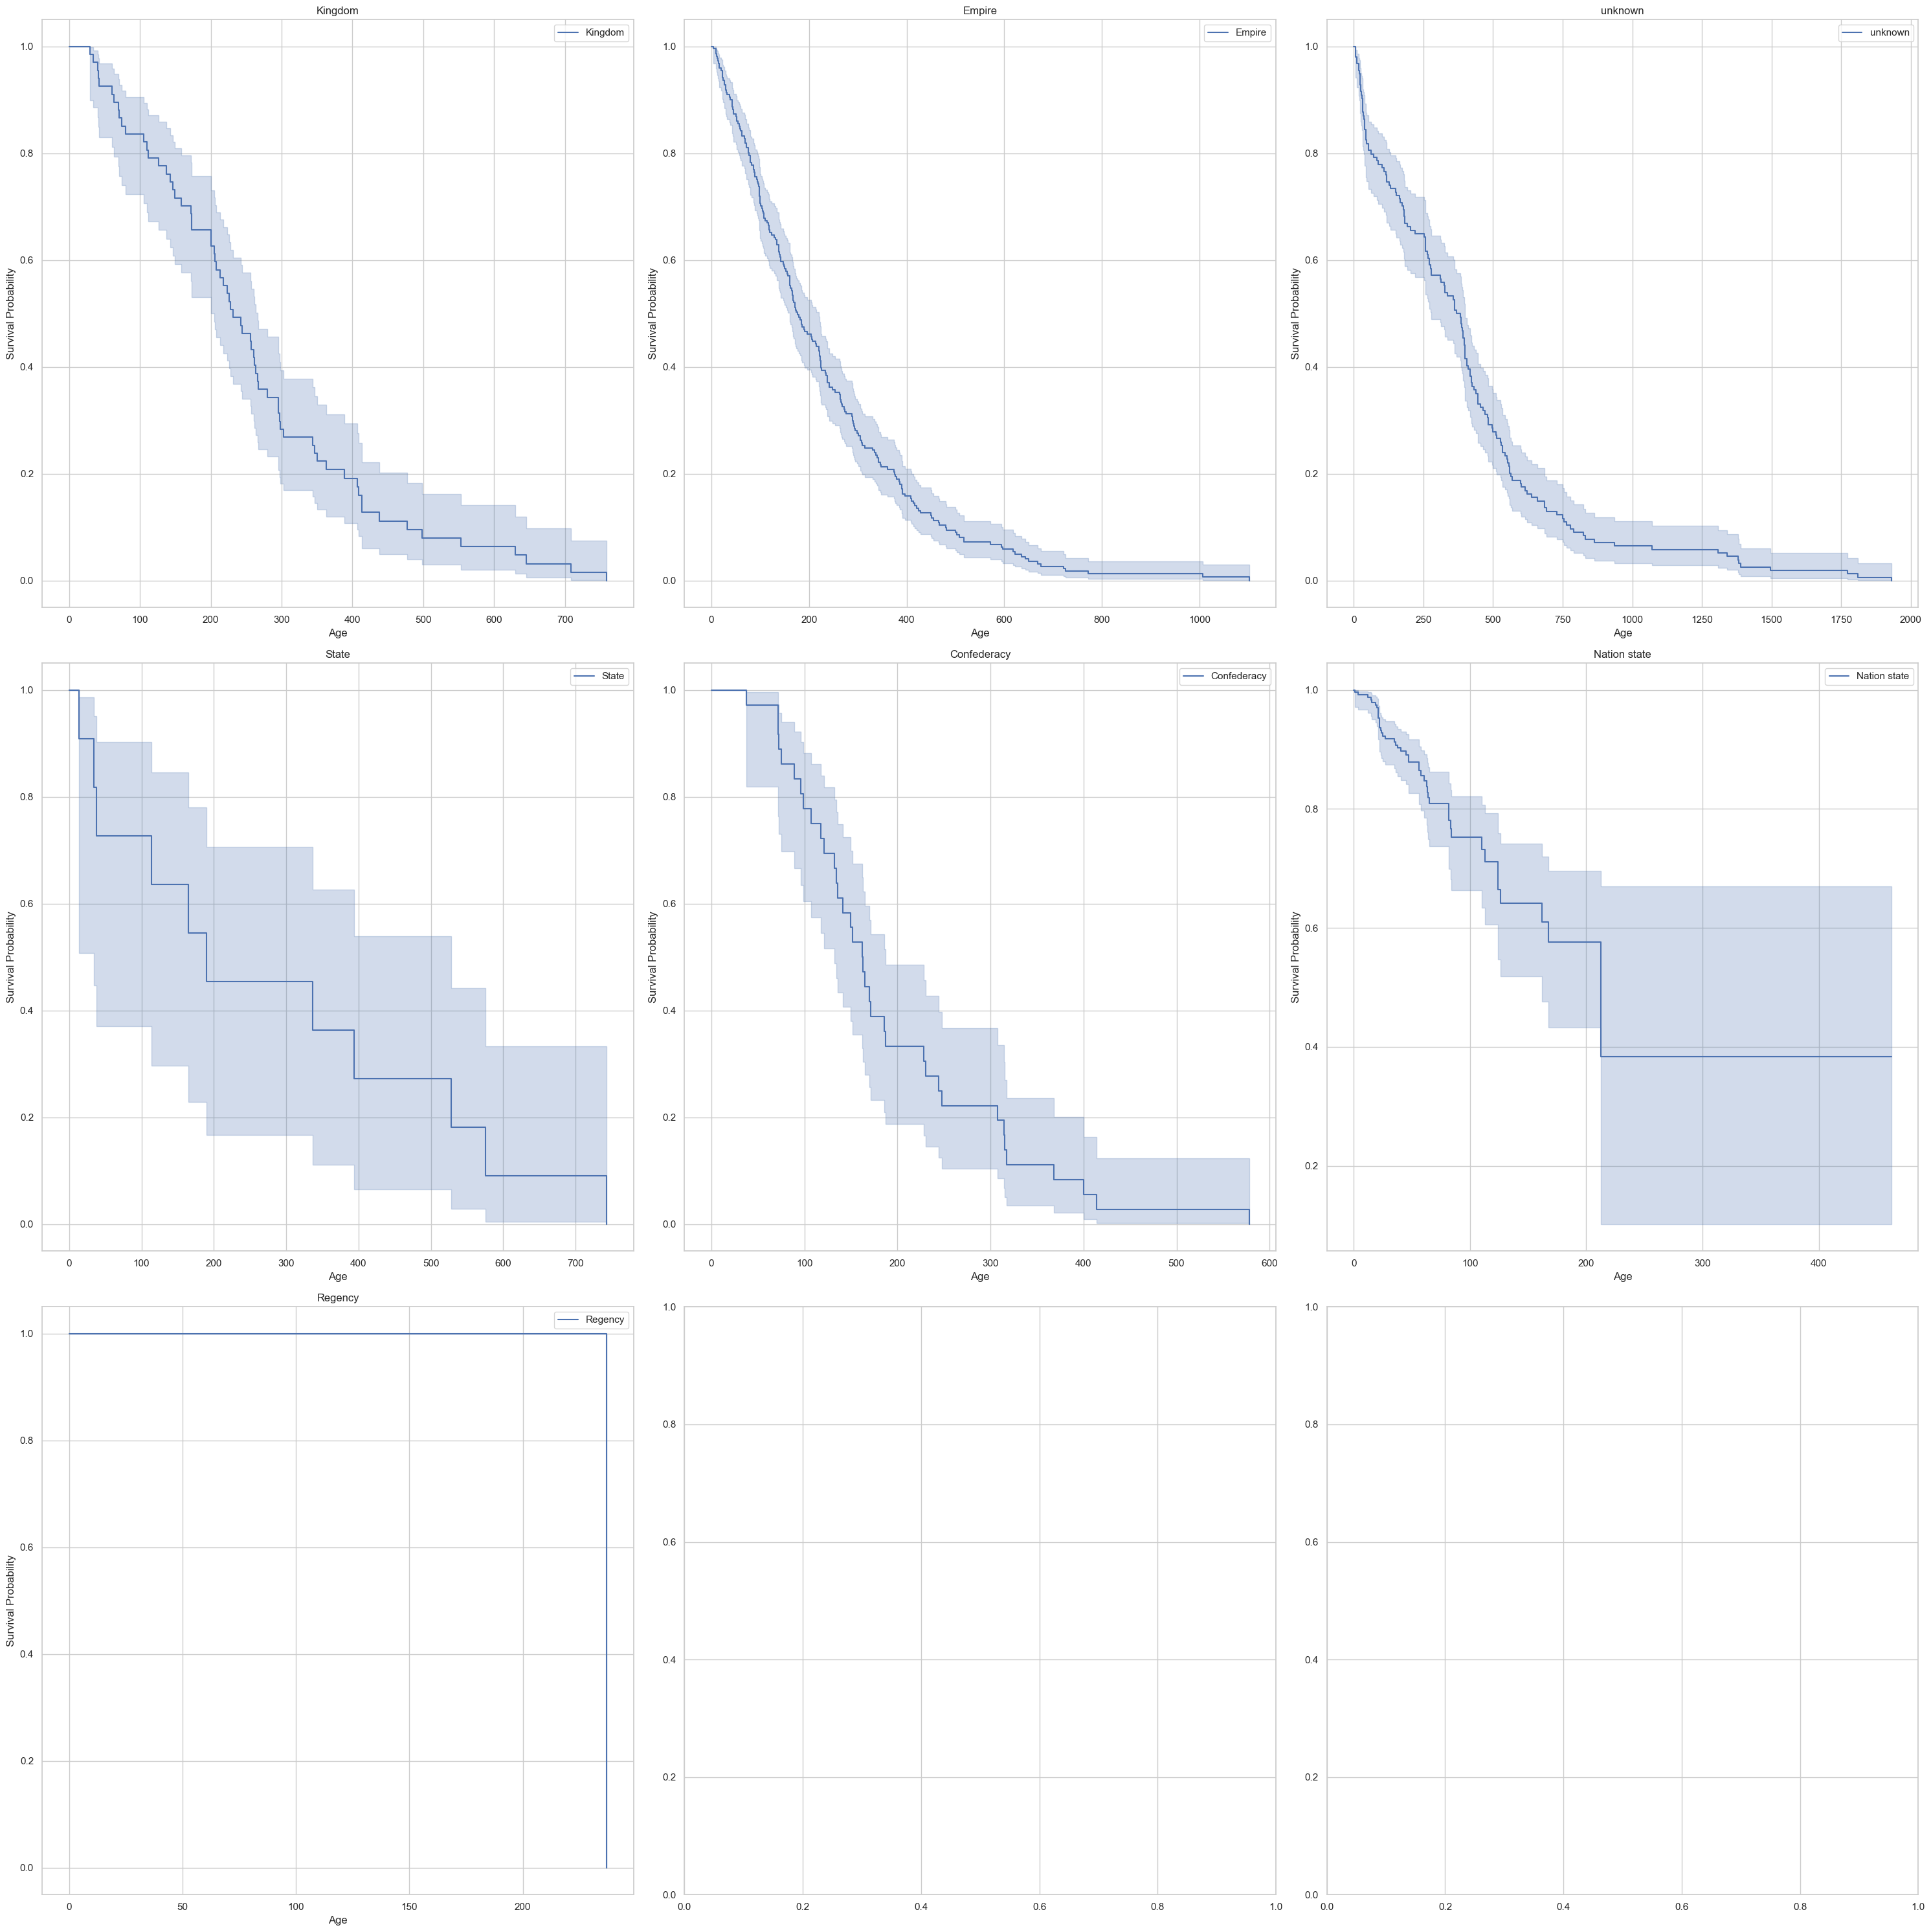

In [124]:
state_type = survival_data['Political_Type'].unique()
fig, axs = plt.subplots(3, 3, figsize=(30, 30))
axs_flat = axs.flatten()

for i, state in enumerate(state_type):
    kmf = KaplanMeierFitter()
    kmf.fit(
        survival_data[survival_data['Political_Type'] == state]['age'],
        event_observed=survival_data[survival_data['Political_Type'] == state]['delta'],
        label=state
    )
    kmf.plot_survival_function(ax=axs_flat[i])
    axs_flat[i].set_title(f'{state}')
    axs_flat[i].set_xlabel('Age')
    axs_flat[i].set_ylabel('Survival Probability')
    axs_flat[i].legend()

plt.tight_layout()
plt.show()

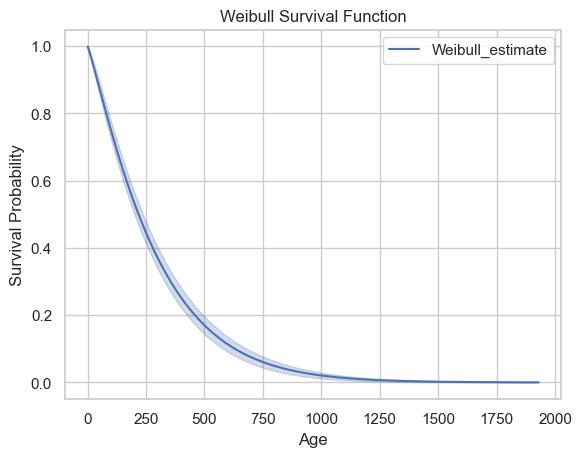

In [ ]:
from lifelines import WeibullFitter, WeibullAFTFitter
wf = WeibullFitter()
wf.fit(survival_data['age'], event_observed=survival_data['delta'])
wf.plot_survival_function()
plt.title('Weibull Survival Function')
plt.xlabel('Age')
plt.ylabel('Survival Probability')
plt.show()

Text(0, 0.5, 'Cumulative Density')

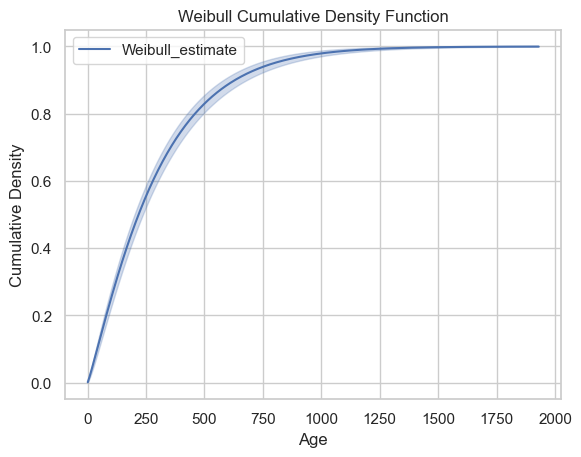

In [126]:
wf.plot_cumulative_density()
plt.title('Weibull Cumulative Density Function')
plt.xlabel('Age')
plt.ylabel('Cumulative Density')


In [155]:
survival_data.head()

,Society_Polity,age,delta,formation_bin,Political_Type,continent,formation
0,Egyptian Dynasties I and II,413.0,1,Q1,Kingdom,Africa,-3100.0
1,Old Egytpian Kingdom,466.0,1,Q1,Empire,Africa,-2621.0
672,Guo,1930.0,1,Q1,unknown,Asia,-2600.0
2,The Akkadian Empire (Sumer),186.0,1,Q1,Empire,Asia,-2334.0
3,Ur III Dynasty (Neo-Sumerian Empire),108.0,1,Q1,Empire,Asia,-2112.0


<lifelines.WeibullAFTFitter: fitted with 552 total observations, 183 right-censored observations>
             duration col = 'age'
                event col = 'delta'
   number of observations = 552
number of events observed = 369
           log-likelihood = -2462.88
         time fit was run = 2025-06-10 23:21:23 UTC

---
                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                      
lambda_ Intercept      6.26    523.75      0.10            6.07            6.45              434.40              631.48
        formation_age -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
rho_    Intercept      0.12      1.13      0.04            0.05            0.20                1.05                1.22

                       cmp to     z      p  -log2(p)
param   covariate                                   
lambda_ Intercept        0.00 65.60 <0.005       inf
        formation_age    0.00 -6.50 <0.005     33.52
rho_    Intercept        0.00  3.24 <0.005      9.70
---
Concordance = 0.60
AIC = 4931.76
log-likelihood ratio test = 45.00 on 1 df
-log2(p) of ll-ratio test = 35.56

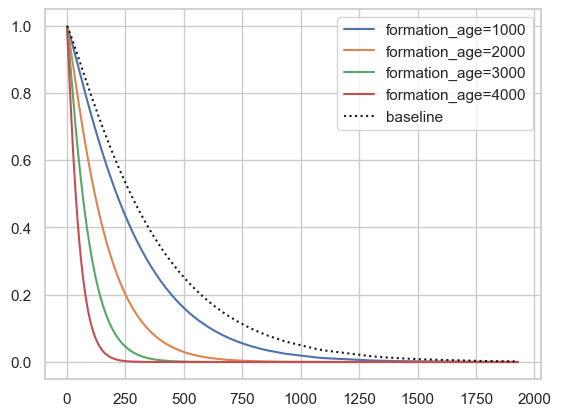

In [162]:
from lifelines import WeibullAFTFitter
import numpy as np
survival_data_cleaned = survival_data.drop(columns=['Society_Polity', 'formation_bin', 'Political_Type', 'continent']).dropna()

# Add a log_formation column for modeling
survival_data_cleaned['formation_age'] = 2016 - survival_data_cleaned['formation'].abs()
# Drop rows with NaN in log_formation (if any)

waf = WeibullAFTFitter()
waf.fit(survival_data_cleaned, duration_col='age', event_col='delta', formula="formation_age")
waf.print_summary()
waf.plot_partial_effects_on_outcome(covariates='formation_age', values=[1000, 2000, 3000, 4000])
plt.show() 

<lifelines.CoxPHFitter: fitted with 552 total observations, 183 right-censored observations>
             duration col = 'age'
                event col = 'delta'
      baseline estimation = breslow
   number of observations = 552
number of events observed = 369
   partial log-likelihood = -1802.40
         time fit was run = 2025-06-10 22:45:47 UTC

---
                              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                     
Political_Type_Empire        -0.01      0.99      0.25           -0.49            0.48                0.62                1.61
Political_Type_Kingdom        0.08      1.08      0.31           -0.54            0.69                0.58                1.99
Political_Type_Nation state   0.43      1.54      0.35           -0.25            1.12                0.78                3.07
Political_Type_State          0.27      1.31      0.62           -0.95            1.49                0.39                4.44
Political_Type_unknown        0.10      1.11      0.32           -0.52            0.73                0.59                2.08
formation_bin_Q2              1.45      4.24      0.22            1.00            1.89                2.73                6.59
formation_bin_Q3              1.15      3.17      0.26            0.65            1.66                1.91                5.28
formation_bin_Q4              0.09      1.09      0.42           -0.74            0.92                0.47                2.50
continent_Asia               -0.04      0.96      0.24           -0.52            0.43                0.60                1.53
continent_Australia         -12.95      0.00   1415.75        -2787.77         2761.87                0.00                 inf
continent_Europe             -0.42      0.66      0.27           -0.94            0.11                0.39                1.11
continent_N.America          -0.92      0.40      0.57           -2.05            0.20                0.13                1.22
continent_S.America          -1.70      0.18      0.56           -2.80           -0.60                0.06                0.55

                             cmp to     z      p  -log2(p)
covariate                                                 
Political_Type_Empire          0.00 -0.02   0.98      0.02
Political_Type_Kingdom         0.00  0.24   0.81      0.31
Political_Type_Nation state    0.00  1.23   0.22      2.20
Political_Type_State           0.00  0.44   0.66      0.59
Political_Type_unknown         0.00  0.33   0.74      0.43
formation_bin_Q2               0.00  6.43 <0.005     32.89
formation_bin_Q3               0.00  4.45 <0.005     16.83
formation_bin_Q4               0.00  0.20   0.84      0.25
continent_Asia                 0.00 -0.18   0.86      0.23
continent_Australia            0.00 -0.01   0.99      0.01
continent_Europe               0.00 -1.56   0.12      3.07
continent_N.America            0.00 -1.61   0.11      3.23
continent_S.America            0.00 -3.02 <0.005      8.64
---
Concordance = 0.68
Partial AIC = 3630.79
log-likelihood ratio test = 112.99 on 13 df
-log2(p) of ll-ratio test = 57.52

<Axes: xlabel='log(HR) (95% CI)'>

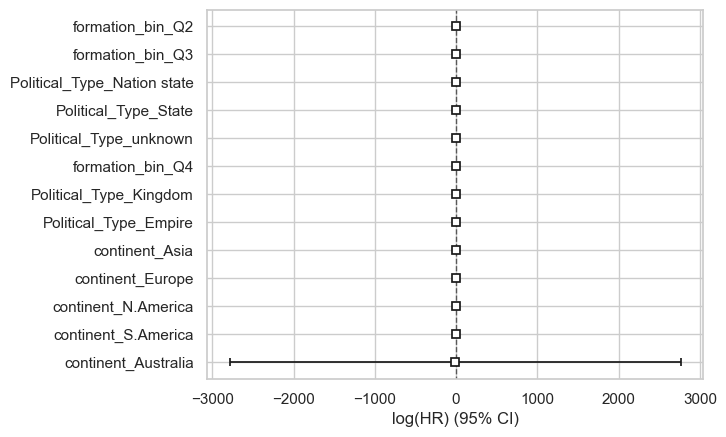

In [143]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
# Fit the model using the encoded survival data
cph.fit(X, duration_col='age', event_col='delta')
cph.print_summary()
cph.plot()

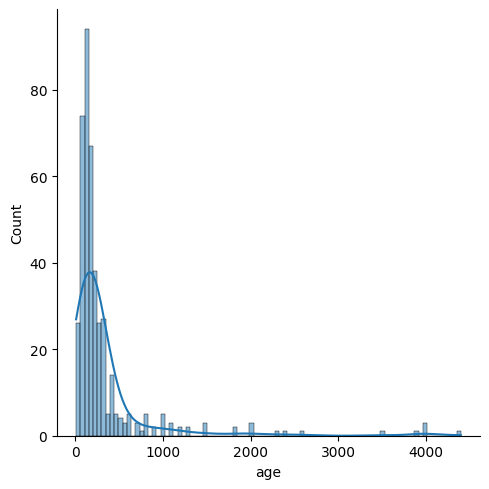

In [ ]:
sns.displot(table1['age'], kde=True)

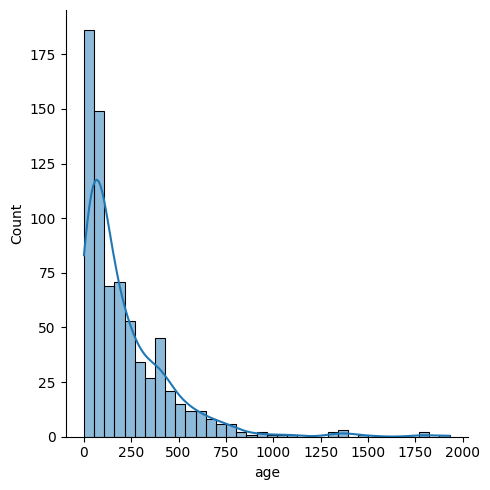

In [13]:
sns.displot(table2['age'], kde=True)

In [14]:
table2.columns.values

array(['Society_Polity', 'State_Formation_low', 'State_Formation_high',
       'formation', 'Adulthood_Date', 'Peak_Power', 'Collapse_low',
       'Collapse_high', 'collapse', 'Approx_age', 'age', 'Political_Type',
       'Political_Sub_Type', 'Region', 'Capital', 'Source',
       'Proximate_Cause', 'Underlying_Cause', 'Collapse_Tra', 'Notes',
       'Relatationship', 'Capital_1', 'lat1', 'continent', 'lon1',
       'Capital_2', 'lat2', 'lon2', 'Capital_3', 'lat3', 'lon3',
       'violience_attractor', 'censored'], dtype=object)

In [15]:
table2['Proximate_Cause'] = table2['Proximate_Cause'].astype(str)
table2['Underlying_Cause'] = table2['Underlying_Cause'].astype(str)
table2['cause'] = table2[['Proximate_Cause', 'Underlying_Cause']].agg(' '.join, axis=1)

In [16]:
table2['cause'] = table2['cause'].str.replace('nan', ' ').str.strip()

In [17]:
import geopandas as gpd
from shapely.geometry import Point
def create_geodataframe(df, lat_col, lon_col):
    geometry = [Point(xy) for xy in zip(df[lon_col], df[lat_col])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry)
    return gdf

In [18]:
gdf  = create_geodataframe(table2, 'lat1', 'lon1')

In [39]:
import folium
import branca
def create_map(gdf, zoom_start=6):
    # Filter out rows with valid lat1 and lon1
    gdf_valid = gdf.dropna(subset=['lat1', 'lon1'])
    # Remove rows where lat1 or lon1 is zero (invalid coordinates)
    gdf_valid = gdf_valid[(gdf_valid['lat1'] != 0) & (gdf_valid['lon1'] != 0)]
    if gdf_valid.empty:
        raise ValueError("No valid coordinates to plot on the map.")
    colormap = branca.colormap.linear.YlOrRd_09.scale(gdf_valid['age'].min(), gdf_valid['age'].max())
    m = folium.Map(location=[gdf_valid['lat1'].mean(), gdf_valid['lon1'].mean()], zoom_start=zoom_start)
    for _, row in gdf_valid.iterrows():
        folium.CircleMarker(
            location=[row['lat1'], row['lon1']],
            radius=5,
            color='black',
            fill=True,
            fill_color=colormap(row['age']),
            fill_opacity=0.7,
            popup=folium.Popup(
                f"Name: {row['Society_Polity']}<br>"
                f"Cause: {row['cause']}<br>"
                f"Age: {row['age']}<br>"
                f"Political Type: {row['Political_Type']}<br>"
                f"Political Subtype: {row['Political_Sub_Type']}",
                max_height=150,
                max_width=300
            ),
            tooltip=f"Name: {row['Society_Polity']}<br>Age: {row['age']}"
        ).add_to(m)
    colormap.caption = 'Age'
    colormap.add_to(m)
    return m
m = create_map(gdf)
m

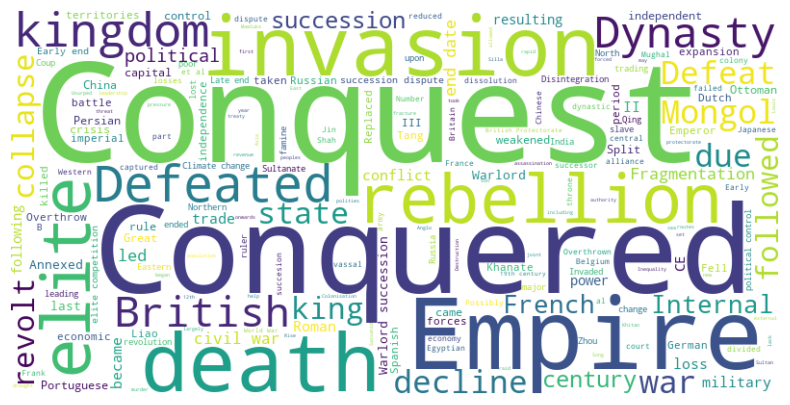

In [40]:
import wordcloud
def create_wordcloud(text, width=800, height=400):
    wordcloud_obj = wordcloud.WordCloud(width=width, height=height, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_obj, interpolation='bilinear')
    plt.axis('off')
    plt.show()
text = ' '.join(table2['cause'].dropna())
create_wordcloud(text)